#### Для простой однородной пластины

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm

#Функция вывода матрицы
def Output(A):
    for i in range (len(A)):
        print(A[i])
    return

#Функция из правой части для подготовки
def f(x, y):
    return -2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y)

#Счетчики итераций
k1 = 0
k2 = 0

## Зейдель по модулю разности:

In [2]:
a = 0
b = 1
h1 = 0.05
e = 0.001
N1 = int((b-a)/h1)
V0 = []

#Создание матрицы V0
for i in range (N1):
    V0.append([])
    for j in range (N1):
        V0[i].append(0)
        
Output(V0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
#Функция вычисления нормы разности двух матриц
def DNormInf(V1, V2):
    res = []
    for i in range(len(V1)):
        res.append([])
        for j in range(len(V1)):
            res[i].append(abs(V1[i][j] - V2[i][j]))
    Pmax = res[0][0]
    for i in range (len(V1)):
        for j in range(len(V1)):
            if res[i][j]>Pmax:
                Pmax = res[i][j]
    return Pmax

#Метод Зейделя с заданной точностью для подготовки 
def Seidel(V, h, e):
    global a, b, k1
    N = int((b-a)/h)
    x = np.linspace(a,b,N)
    y = np.linspace(a,b,N)
    V1 = copy.deepcopy(V)
    N = len(V1)
    V2 = copy.deepcopy(V)
    for i in range(1, N-1):
        for j in range(1, N-1):
            V2[i][j] = (1/4*(V1[i-1][j] + V1[i+1][j] + V1[i][j-1] + V1[i][j+1]) -
                        (h**2/4)*f(x[i], y[j]))
    #while (DNormE(V1, V2) > e) and (h>e):
    p = 1
    k1 = 0
    while p > e:
        V1 = copy.deepcopy(V2)
        for i in range(1, N-1):
            for j in range(1, N-1):
                
                V2[i][j] = (1/4*(V2[i-1][j] + V1[i+1][j] + V2[i][j-1] + V1[i][j+1]) - 
                            (h**2/4)*f(x[i], y[j]))
        p = DNormInf(V1, V2)
        k1+=1
    print("Точность метода 1: ", p)
    print("Количество итераций: ", k1)
    return np.array(V2), N

#Метод Зейделя с заданным количеством итераций для подготовки
def SeidelN(V, h, n):
    global a, b
    N = int((b-a)/h)
    x = np.linspace(a,b,N)
    y = np.linspace(a,b,N)
    V1 = copy.deepcopy(V)
    N = len(V1)
    V2 = copy.deepcopy(V)
    for i in range(1, N-1):
        for j in range(1, N-1):
            V2[i][j] = (1/4*(V1[i-1][j] + V1[i+1][j] + V1[i][j-1] + V1[i][j+1]) - 
                        (h**2/4)*f(x[i], y[j]))
    for i in range(n):
        V1 = copy.deepcopy(V2)
        for i in range(1, N-1):
            for j in range(1, N-1):
                V2[i][j] = (1/4*(V2[i-1][j] + V1[i+1][j] + V2[i][j-1] + V1[i][j+1]) - 
                            (h**2/4)*f(x[i], y[j]))
    print("Точность метода 2: ", DNormInf(V1, V2))
    return np.array(V2), N    


In [4]:
P2, Np2 = Seidel(V0, 0.05,e)


Точность метода 1:  0.0009874800542963857
Количество итераций:  118


In [5]:
xp2 = np.linspace(a,b,Np2)
yp2 = np.linspace(a,b,Np2)

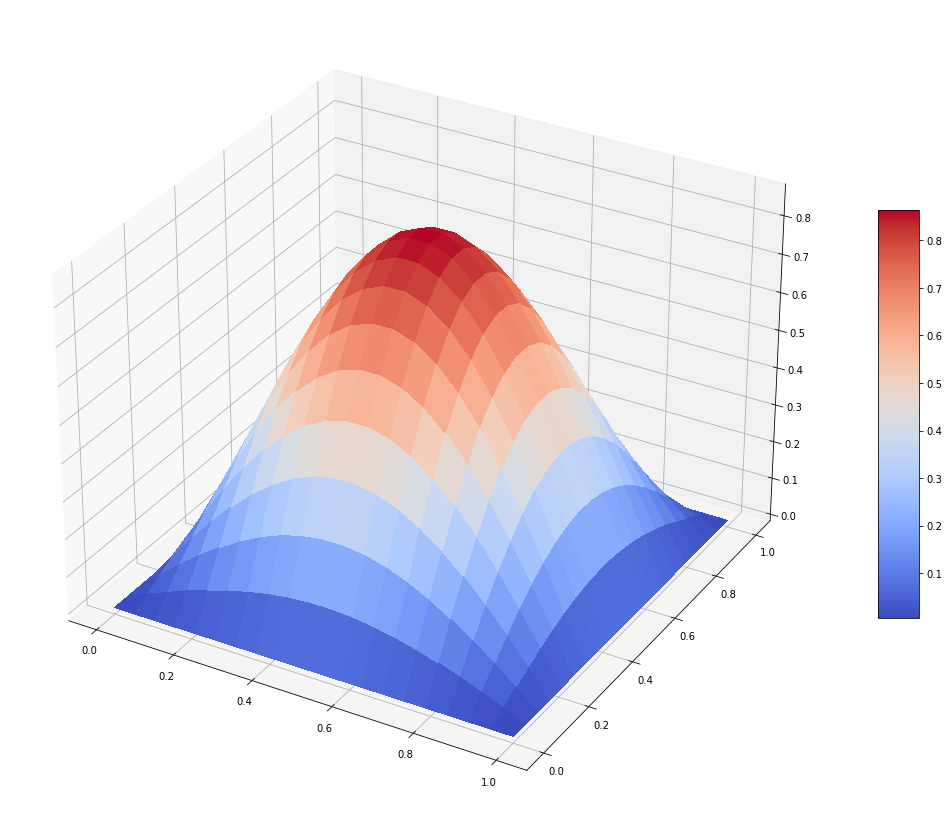

In [6]:
import matplotlib.pyplot as plt

import numpy as np


fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')



xp2, yp2 = np.meshgrid(xp2,yp2)
surf = ax.plot_surface(xp2, yp2, P2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

#ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

## Для графика погрешности:

In [7]:
'''def NormE(A):
    N = len(A)
    S = 0
    for i in range (N):
        for j in range(N):
            S += (A[i][j])**2
    return np.sqrt(S)

def Dif(A, B):
    N = len(A)
    Res = []
    for i in range (N):
        Res.append([])
        for j in range (N):
            Res[i].append(A[i][j] - B[i][j])
    return Res

def DNormE(V1, V2):
    D = Dif(V1, V2)
    return NormE(D)'''





'def NormE(A):\n    N = len(A)\n    S = 0\n    for i in range (N):\n        for j in range(N):\n            S += (A[i][j])**2\n    return np.sqrt(S)\n\ndef Dif(A, B):\n    N = len(A)\n    Res = []\n    for i in range (N):\n        Res.append([])\n        for j in range (N):\n            Res[i].append(A[i][j] - B[i][j])\n    return Res\n\ndef DNormE(V1, V2):\n    D = Dif(V1, V2)\n    return NormE(D)'

In [8]:
V_ans, N1 = Seidel(V0, 0.05, e)

Точность метода 1:  0.0009874800542963857
Количество итераций:  118


In [9]:
x1 = np.linspace(a,b,N1)
y1 = np.linspace(a,b,N1)

In [10]:
#Функция точного решения
def UTochn(x, y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

#Функция преобразования точного решения в матрицу
def Tochn (V, h):
    global a, b
    N = int((b-a)/h)
    x = np.linspace(a,b,N)
    y = np.linspace(a,b,N)
    V1 = copy.deepcopy(V)
    N = len(V1)
    
    for i in range (1, N-1):
        for j in range (1, N-1):
            V1[i][j] = UTochn(x[i], y[j])
            
    return np.array(V1), N

In [11]:
V_tochn, N_tochn = Tochn(V0, 0.05)

In [12]:
x_t = np.linspace(a,b,N_tochn)
y_t = np.linspace(a,b,N_tochn)

In [13]:
V_ansN, N2 = SeidelN(V0, h1, 100)

Точность метода 2:  0.0016183794190914869


In [14]:
x2 = np.linspace(a,b,N2)
y2 = np.linspace(a,b,N2)

In [15]:
print("Погрешность решения 1-ым методом : ", DNormInf(V_ans, V_tochn))
print("Погрешность решения 2-ым методом ", DNormInf(V_ansN, V_tochn))#'''

Погрешность решения 1-ым методом :  0.13025942179721317
Погрешность решения 2-ым методом  0.15293301674409276


In [16]:
x2 = np.linspace(a,b,N2)
y2 = np.linspace(a,b,N2)
print("Точность решения между двумя методами: ", DNormInf(V_ans, V_ansN))

Точность решения между двумя методами:  0.022673594946879594


In [17]:
#Функция вычисления погрещности в точках (Приближенное относительно точного)
def Pogr(V1, Vt, h):
    global a, b, V0
    N = int((b-a)/h)
    P = copy.deepcopy(V0)
    for i in range (N):
        for j in range (N):
            P[i][j] = abs(Vt[i][j]-V1[i][j])
            
    return np.array(P), N

P, Np =Pogr (V_ans, V_tochn, h1)

In [18]:
x_p = np.linspace(a,b,Np)
y_p = np.linspace(a,b,Np)

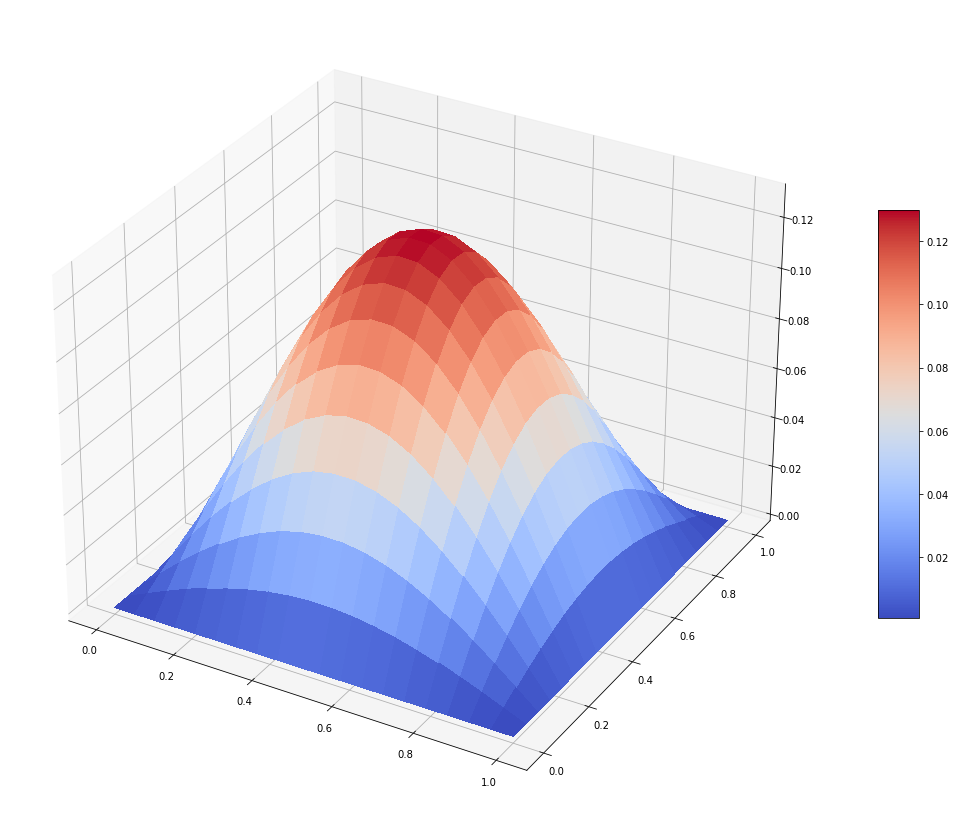

In [19]:
#Вывод графика погрешности
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x_p, y_p = np.meshgrid(x_p,y_p)
surf = ax.plot_surface(x_p, y_p, P, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)

## График точного решения:

In [20]:
a = 0
b = 1
h = 0.05
e = 0.001
N = int((b-a)/h)
V0 = []

for i in range (N):
    V0.append([])
    for j in range (N):
        V0[i].append(0)

 
        
Output(V0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
#Вычисление погрешности относительно точного решения
V_tochn, N_tochn = Tochn(V0, h)
x_t = np.linspace(a,b,N_tochn)
y_t = np.linspace(a,b,N_tochn)
print("Погрешность решения 1-ым методом : ", DNormInf(V_ans, V_tochn))
print("Погрешность решения 2-ым методом ", DNormInf(V_ansN, V_tochn))

Погрешность решения 1-ым методом :  0.13025942179721317
Погрешность решения 2-ым методом  0.15293301674409276


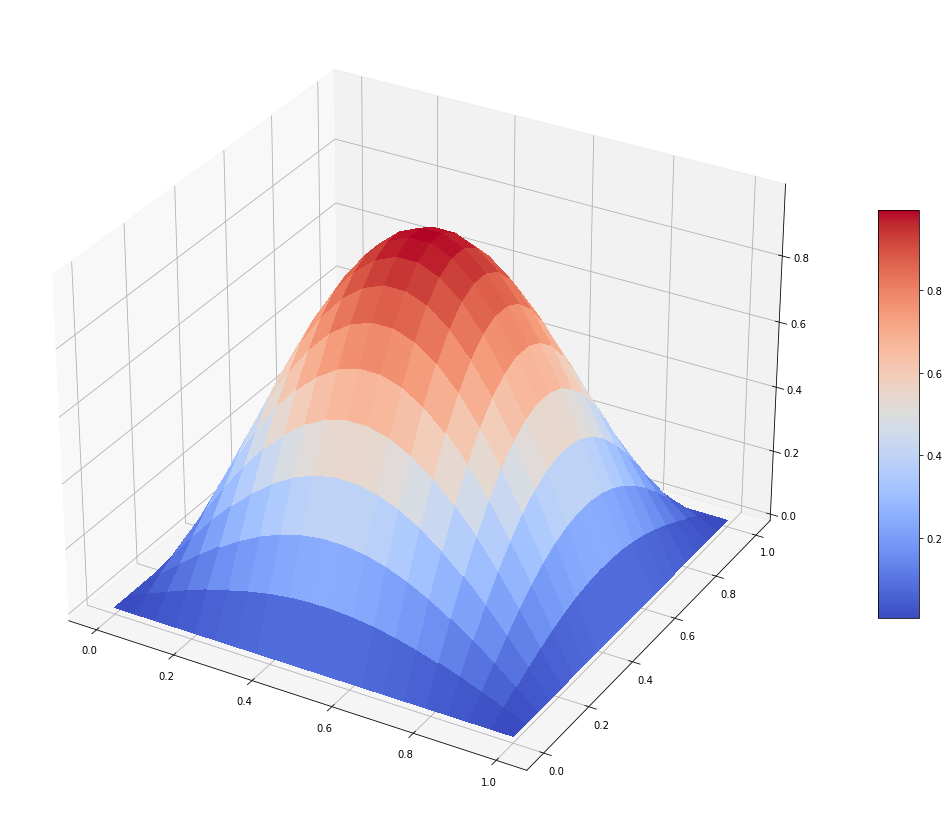

In [22]:
#Вывод графиика точного решения
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x_t, y_t = np.meshgrid(x_t,y_t)
surf = ax.plot_surface(x_t, y_t, V_tochn, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)

 ## График приближенного решения:

In [23]:
V_ans, N1 = Seidel(V0, h, e)

Точность метода 1:  0.0009874800542963857
Количество итераций:  118


In [24]:
x1 = np.linspace(a,b,N1)
y1 = np.linspace(a,b,N1)

In [25]:
V_ansN, N2 = SeidelN(V0, h, 100)

Точность метода 2:  0.0016183794190914869


In [26]:
x2 = np.linspace(a,b,N2)
y2 = np.linspace(a,b,N2)
print("Точность решения между двумя методами: ", DNormInf(V_ans, V_ansN))

Точность решения между двумя методами:  0.022673594946879594


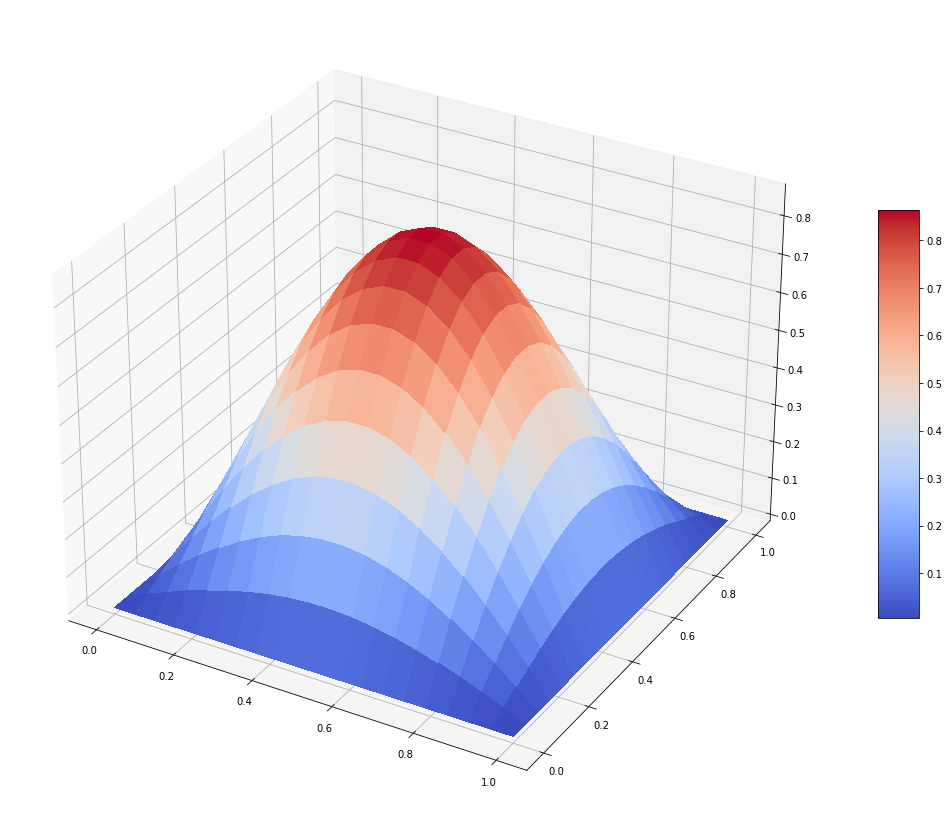

In [27]:
#Вывод графика приближенного решения с заданной точностью
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x1, y1 = np.meshgrid(x1,y1)
surf = ax.plot_surface(x1, y1, V_ans, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)

#### Зададим уравнение границы:

\begin{cases}
    y = 0.5, x \in [0, \frac{1}{3}]\\
    y = x + \frac{1}{6}, x \in [\frac{1}{3}, \frac{1}{2}]\\
    y = -x + \frac{1}{6}, x \in [\frac{1}{2}, \frac{2}{3}]\\
    y = 0.5, x \in [\frac{2}{3}, 1]\\
\end{cases}

In [28]:
#Функция, задающая границу раздела частей
def Ygran(x):
    if (x<=1/3) or (x>2/3):
        return 0.5
    elif (1/3<x) and (x<=1/2) :
        return x+1/6
    elif (1/2<x) and (x<=2/3) :
        return -x+1/6
    
"""def F(x, y):
    if (y<=Ygran(x)):
        return -2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y)
    else:
        return 50*(-2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y))"""

#Функция для двух частей пластины        
def F(x, y):
    if (y>=Ygran(x)):
        return -1
    else:
        return -50
       
#Метод Зейделя с заданной точностью для вычислительного эксперимента    
def Seidel2(V, h, e):
    global a, b, k2
    N = int((b-a)/h)
    x = np.linspace(a,b,N)
    y = np.linspace(a,b,N)  
    V1 = copy.deepcopy(V)
    N = len(V1)
    V2 = copy.deepcopy(V)
    for i in range(1, N-1):
        for j in range(1, N-1):
            V2[i][j] = (1/4*(V1[i-1][j] + V1[i+1][j] + V1[i][j-1] + V1[i][j+1]) -
                        (h**2/4)*F(x[i], y[j]))
    p = 1
    k2 = 0
    while p > e:
        V1 = copy.deepcopy(V2)
        for i in range(1, N-1):
            for j in range(1, N-1):
                V2[i][j] = (1/4*(V2[i-1][j] + V1[i+1][j] + V2[i][j-1] + V1[i][j+1]) -
                            (h**2/4)*F(x[i], y[j]))
        p = DNormInf(V1, V2)
        k2+=1
    print("Точность метода 1: ", p)
    print("Количество итераций: ", k2)
    return np.array(V2), N



In [29]:
V3, N3 = Seidel2(V0, h, e)

Точность метода 1:  0.000988138470340516
Количество итераций:  137


In [30]:
x3 = np.linspace(a,b,N3)
y3 = np.linspace(a,b,N3)

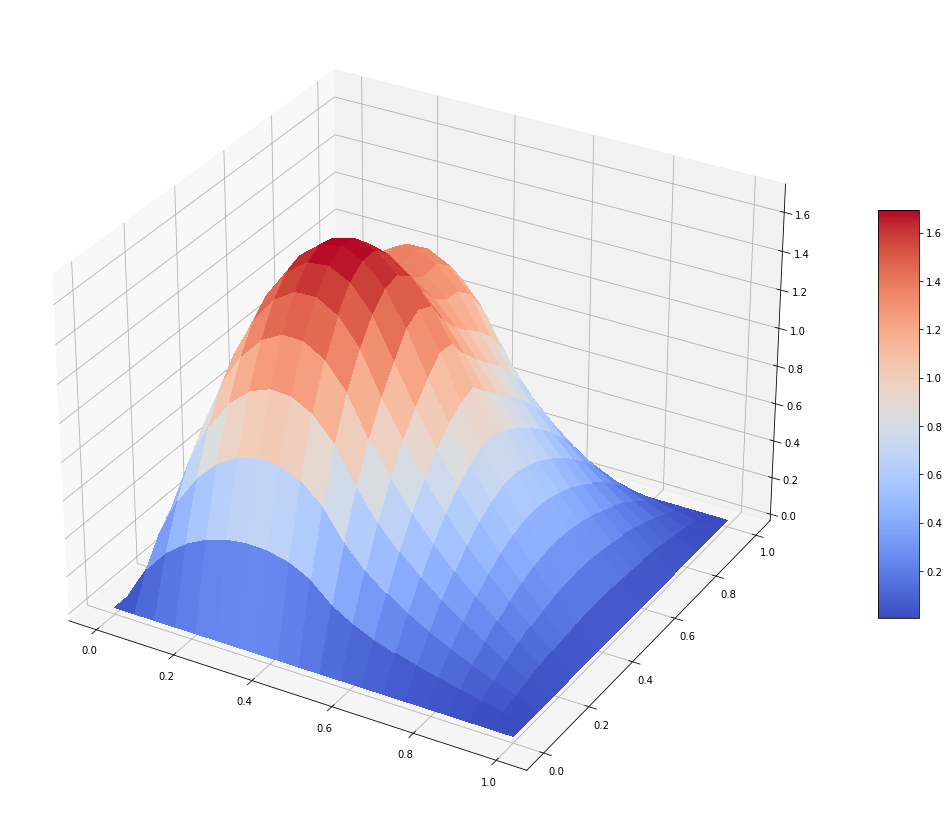

In [31]:
#Вывод графика результатов вычислительного эксперимента
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x3, y3 = np.meshgrid(x3,y3)
surf = ax.plot_surface(x3, y3, V3, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)

In [32]:
#Вторая функция для вычислительного эксперимента    
def F(x, y):
    if (y>=Ygran(x)):
        return -1
    else:
        return -1000


In [33]:
V3, N3 = Seidel2(V0, h, e)

Точность метода 1:  0.000989144941634379
Количество итераций:  245


In [34]:
x3 = np.linspace(a,b,N3)
y3 = np.linspace(a,b,N3)

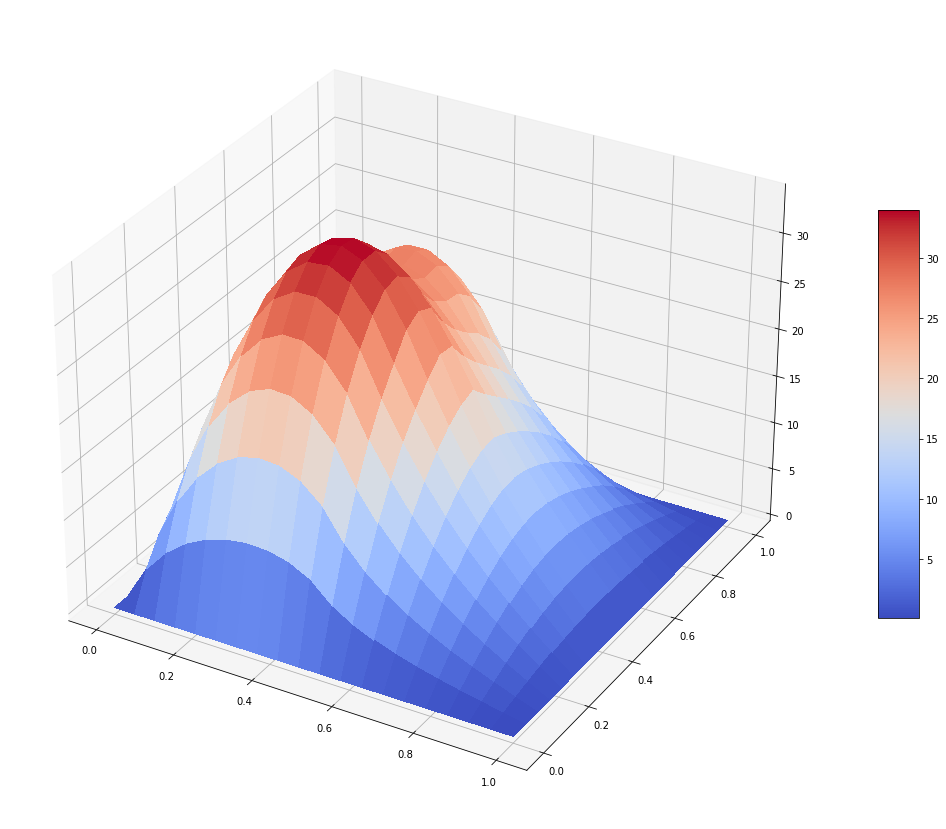

In [35]:
#Вывод графика результатов вычислительного эксперимента с усиленным источником
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x3, y3 = np.meshgrid(x3,y3)
surf = ax.plot_surface(x3, y3, V3, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)

In [40]:
    
#Вторая функция для вычислительного эксперимента (поменяв воздействие местами)
def F(x, y):
    if (y>=Ygran(x)):
        return -1000
    else:
        return -1 

In [41]:
V3, N3 = Seidel2(V0, h, e)

Точность метода 1:  0.0009825211052003624
Количество итераций:  260


In [42]:
x3 = np.linspace(a,b,N3)
y3 = np.linspace(a,b,N3)

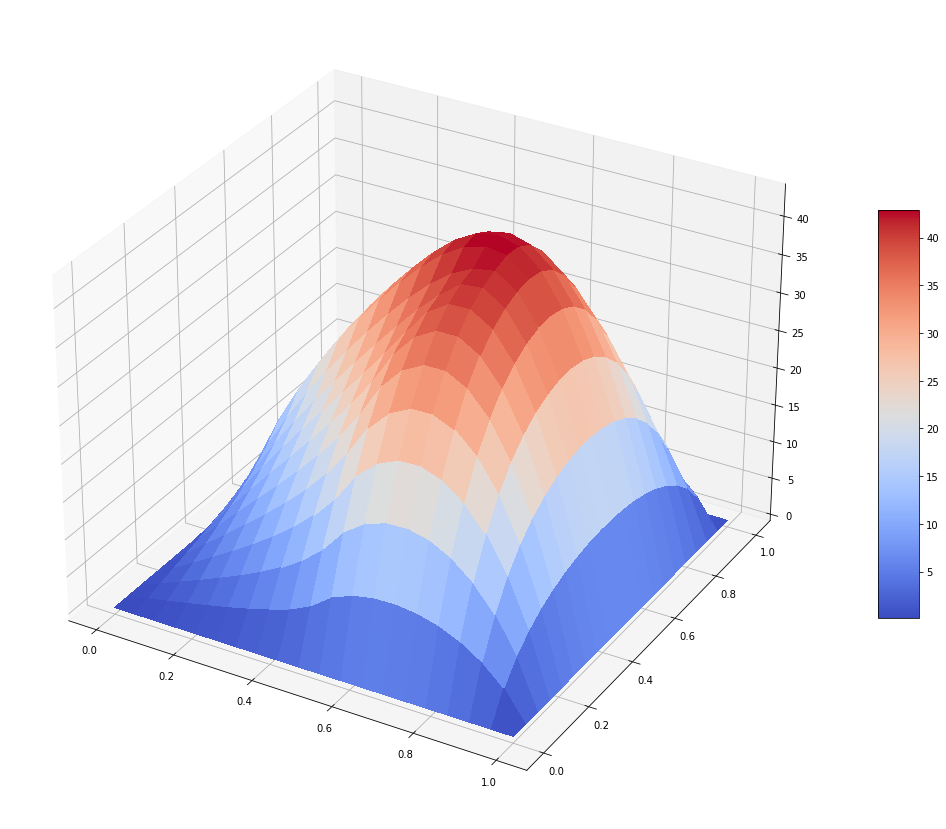

In [43]:
#Вывод графика результатов вычислительного эксперимента с усиленным источником (поменяв воздействие местами)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')

x3, y3 = np.meshgrid(x3,y3)
surf = ax.plot_surface(x3, y3, V3, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)